In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Task 1 : Objectives**

- Predict average power consumption for any given day using weather data as features. Use decision tree regression with optimal hyper-parameter settings as the method to predict consumption. The numeric data from weather_daily.csv will be used as features.<br>
- Use 70% of data for training and 30% for testing <br>
- Plot the decision tree obtained and analyze the most significant weather factors that influence power consumption.<br>

 

**Checkpoints for Task 1**

- Combine all blocks(block_0.csv, block_1.csv, etc…)  into a single pandas data-frame- keeping on relevant columns.<br>
- Find total energy consumed in a day by each household in the energy data-frame<br>
- Count the number of houses measured for each day from the energy data-frame<br>
- Find average energy consumed in a day using relevant houses for each date. Note that readings for a day can have a varying number of households.<br>
- Open weather information in weather_daily.csv to another pandas data frame. <br>
- In weather_daily.csv, the date is given as time-stamp (e.g. 2011-12-24 23:00:00). Convert it into yyyy-mm-dd format (e.g. 2011-12-24). This is required to match the dates with the energy data frame.<br>
- Remove columns involving non-numeric information from weather_daily.csv. Use only numeric values from the weather data for training decision trees. (Avoid using dates, words etc.)<br>
- Create a new data frame by combining valid weather data with average energy for each day<br>
- Create train and test splits of data<br>
- Train the default decision tree regressor with no hyperparameter tuning (DT1) on the train split<br>
- Plot the decision tree and compute Mean Square Error for average energy prediction on train data and test data<br>
- Use hyperparameter tuning (DT2) and train the decision tree on train split.<br>
- Plot the decision tree and compute Mean Square Error for average energy prediction on train data and test data<br>
- Comment on train and test errors of DT1 and DT2<br>
- Analyze the most important weather factors that affect energy consumption from the decision tree diagrams. <br>

## **Step 1: Loading the daily data in Energy DataFrame**

### **Downloading the dataset from One-Drive to Current working Directory**

Setting up the appropriate directory to get data (It will directly download the data from 
[One-Drive](https://powergrid1989-my.sharepoint.com/:u:/g/personal/60003871_powergrid_in/EZEtdj-1DSREvgKtYQIFFiEBP9P-hgMLON2Nl8ssSN4d7w?e=hgOM3R&download=1) into Current Working Directory)

In [3]:
import requests
import zipfile
import os

URL = 'https://powergrid1989-my.sharepoint.com/:u:/g/personal/60003871_powergrid_in/EZEtdj-1DSREvgKtYQIFFiEBP9P-hgMLON2Nl8ssSN4d7w?e=hgOM3R&download=1'

def download_and_extract_zip(url, destination_folder):
    """Downloads a zip file from a URL and extracts its contents to the specified destination folder."""

    try:
        # Send an HTTP GET request to the OneDrive link to download the file
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        response.raise_for_status()

        # Save the zip file to a temporary location
        zip_file_path = "temp.zip"
        with open(zip_file_path, "wb") as f:
            f.write(response.content)

        # Create the destination folder if it doesn't exist
        os.makedirs(destination_folder, exist_ok=True)

        # Extract the contents of the zip file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(destination_folder)

        print(f"Zip file downloaded and extracted to: {destination_folder}")

    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")

    finally:
        # Remove the temporary zip file
        if os.path.exists(zip_file_path):
            os.remove(zip_file_path)


destination_folder = os.getcwd()
download_and_extract_zip(URL, destination_folder)


Zip file downloaded and extracted to: /workspaces/codespaces-blank/Assignment


### Loading the House-wise Data into a single energy dataframe after performing EDA

In [4]:
# Step 1: Combine all blocks into a single pandas data-frame


# Changing the Current working Directory to the Downloaded Folder
os.chdir('DS_Power Supply_Demand+Weather')
directory = os.path.join(os.getcwd(),"Energy_Consumption_Data")

# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Create an empty DataFrame to store the combined data
energy_df = pd.DataFrame()

# Loop through each CSV file and append the data to the combined DataFrame
for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    df = pd.read_csv(file_path, index_col=['day'])
    df.drop('LCLid', axis=1, inplace=True)    # Drop LCLid column
    df = df.fillna(df.median())               # Fill Missing values with median
    df_grouped = df.groupby(df.index).sum()   # Combining the readings from all the smart meters for a single day 
    energy = pd.DataFrame(df_grouped.sum(axis=1), columns=[f'Energy_{csv_file[:-4]}'])  # Use a unique suffix
    energy_df = pd.merge(energy, energy_df, left_index=True, right_index=True, how='outer', suffixes=["",""])


energy_df = energy_df.round(2)
print("Total Energy consumed daily in each household : ")
energy_df.head()


Total Energy consumed daily in each household : 


,Energy_block_82,Energy_block_86,Energy_block_14,Energy_block_90,Energy_block_76,Energy_block_43,Energy_block_53,Energy_block_66,Energy_block_35,Energy_block_73,...,Energy_block_85,Energy_block_23,Energy_block_57,Energy_block_62,Energy_block_26,Energy_block_97,Energy_block_63,Energy_block_61,Energy_block_77,Energy_block_98
day,,,,,,,,,,,,,,,,,,,,,
2011-11-24,NaN,NaN,NaN,NaN,NaN,NaN,7.49,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-25,NaN,NaN,NaN,NaN,NaN,NaN,6.18,NaN,NaN,NaN,...,NaN,18.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-26,NaN,NaN,NaN,NaN,NaN,NaN,6.96,NaN,NaN,NaN,...,NaN,28.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-27,NaN,NaN,NaN,NaN,NaN,NaN,7.91,NaN,NaN,NaN,...,NaN,24.71,10.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-28,NaN,NaN,NaN,NaN,NaN,NaN,6.54,NaN,NaN,NaN,...,NaN,18.01,13.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking Duplicate rows, if any
print("Duplicate Values (%age) :", energy_df.duplicated().mean()*100)
print("Duplicate Values in index (%age) :", (energy_df.index.duplicated().mean()*100).round(2))

Duplicate Values (%age) : 0.0
Duplicate Values in index (%age) : 0.0


In [6]:
# Counting number of houses meaured daily
  
energy_df_daily_counts = energy_df.count(axis=1)
energy_df_daily_counts

day
2011-11-24      9
2011-11-25     15
2011-11-26     17
2011-11-27     20
2011-11-28     20
             ... 
2014-02-23    112
2014-02-24    112
2014-02-25    112
2014-02-26    112
2014-02-27    112
Length: 827, dtype: int64

In [10]:
# Calculating Average Energy Consumed daily by all households

average_energy = pd.DataFrame(energy_df.mean(axis=1).round(2), columns=['Average_Energy'])
average_energy.index = pd.to_datetime(average_energy.index)
average_energy.rename_axis('Date', inplace=True)
average_energy.head()

,Average_Energy
Date,
2011-11-24,15.50
2011-11-25,16.97
2011-11-26,19.97
2011-11-27,22.24
2011-11-28,20.72


## **Step-2: Loading & Cleaning Weather Data**

In [11]:
# Reading Weather File in a separate dataframe

output_file_weather = "weather_daily.csv"
weather_daily = pd.read_csv(output_file_weather)
weather_daily.head()
 

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [12]:
# Changing Index
weather_daily.set_index('temperatureMaxTime', inplace=True)

# Converting index to Date-time object
weather_daily.index = pd.to_datetime(weather_daily.index)

# Extracting Date
weather_daily.index = weather_daily.index.date
weather_daily.rename_axis('Date', inplace=True)

weather_daily.head()

,temperatureMax,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
Date,,,,,,,,,,,,,,,,,,,,,
2011-11-11,11.96,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,10.87,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
2011-12-11,8.59,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,5.62,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2011-12-27,10.33,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,10.33,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
2011-12-02,8.07,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,5.33,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
2011-12-24,8.22,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,5.02,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [13]:
weather_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 2011-11-11 to 2014-02-15
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperatureMax               882 non-null    float64
 1   windBearing                  882 non-null    int64  
 2   icon                         882 non-null    object 
 3   dewPoint                     882 non-null    float64
 4   temperatureMinTime           882 non-null    object 
 5   cloudCover                   881 non-null    float64
 6   windSpeed                    882 non-null    float64
 7   pressure                     882 non-null    float64
 8   apparentTemperatureMinTime   882 non-null    object 
 9   apparentTemperatureHigh      882 non-null    float64
 10  precipType                   882 non-null    object 
 11  visibility                   882 non-null    float64
 12  humidity                     882 non-null    float64
 13  apparentT

In [14]:
# Checking columns which can be removed

columns_to_remove = weather_daily.select_dtypes(include='object')

# Removing Object columns having dates and strings for making a Decision Tree
weather_daily = weather_daily.drop(columns=columns_to_remove)
weather_daily.info()


<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 2011-11-11 to 2014-02-15
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temperatureMax           882 non-null    float64
 1   windBearing              882 non-null    int64  
 2   dewPoint                 882 non-null    float64
 3   cloudCover               881 non-null    float64
 4   windSpeed                882 non-null    float64
 5   pressure                 882 non-null    float64
 6   apparentTemperatureHigh  882 non-null    float64
 7   visibility               882 non-null    float64
 8   humidity                 882 non-null    float64
 9   apparentTemperatureLow   882 non-null    float64
 10  apparentTemperatureMax   882 non-null    float64
 11  uvIndex                  881 non-null    float64
 12  temperatureLow           882 non-null    float64
 13  temperatureMin           882 non-null    float64
 14  temperatureHigh

In [15]:
# Checking Duplicate rows, if any
print("Duplicate Values (%age) :", weather_daily.duplicated().mean()*100)
print("Duplicate Values in index (%age) :", (weather_daily.index.duplicated().mean()*100).round(2))

Duplicate Values (%age) : 0.0
Duplicate Values in index (%age) : 1.25


- It shows only a single value is missing from columns ```['cloudCover', 'uvIndex']```, which may be imputed by Median.<br> 
- Also, Some indexes are duplicated i.e. on some days there are more than one weather readings.
- Dropping the duplicates will not be a good approach for weather data. However, taking averge data for daily readings seems a good choice 

In [16]:
# Here we try to impute the NA values with median
weather_daily = weather_daily.fillna(weather_daily.median())

# Duplicated values in index i.e. the day where more than one readings have been taken, shall be removed using Mean Values 
weather_daily = weather_daily.groupby(weather_daily.index).aggregate('mean')

weather_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 2011-11-01 to 2014-03-31
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temperatureMax           871 non-null    float64
 1   windBearing              871 non-null    float64
 2   dewPoint                 871 non-null    float64
 3   cloudCover               871 non-null    float64
 4   windSpeed                871 non-null    float64
 5   pressure                 871 non-null    float64
 6   apparentTemperatureHigh  871 non-null    float64
 7   visibility               871 non-null    float64
 8   humidity                 871 non-null    float64
 9   apparentTemperatureLow   871 non-null    float64
 10  apparentTemperatureMax   871 non-null    float64
 11  uvIndex                  871 non-null    float64
 12  temperatureLow           871 non-null    float64
 13  temperatureMin           871 non-null    float64
 14  temperatureHigh

## **Step-3: Combining Weather and Energy data in a separate dataframe**


In [17]:
data = weather_daily.merge(average_energy, left_index=True, right_index=True, how='inner')
data.head()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Average_Energy
Date,,,,,,,,,,,,,,,,,,
2011-11-24,12.93,204.0,8.56,0.41,4.04,1027.22,12.93,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97,15.50
2011-11-25,13.03,243.0,7.24,0.48,5.02,1024.47,12.27,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01,16.97
2011-11-26,12.96,237.0,6.96,0.44,5.75,1025.80,12.96,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05,19.97
2011-11-27,13.54,256.0,5.76,0.42,5.48,1021.11,13.54,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08,22.24
2011-11-28,12.58,190.0,4.39,0.56,2.34,1022.80,10.27,11.84,0.86,10.27,12.58,1.0,10.27,1.31,10.27,1.31,0.12,20.72


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816 entries, 2011-11-24 to 2014-02-27
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temperatureMax           816 non-null    float64
 1   windBearing              816 non-null    float64
 2   dewPoint                 816 non-null    float64
 3   cloudCover               816 non-null    float64
 4   windSpeed                816 non-null    float64
 5   pressure                 816 non-null    float64
 6   apparentTemperatureHigh  816 non-null    float64
 7   visibility               816 non-null    float64
 8   humidity                 816 non-null    float64
 9   apparentTemperatureLow   816 non-null    float64
 10  apparentTemperatureMax   816 non-null    float64
 11  uvIndex                  816 non-null    float64
 12  temperatureLow           816 non-null    float64
 13  temperatureMin           816 non-null    float64
 14  tempera

- There are total 816 entries for which both weather data and average energy data is present

## **Step-4: Performing Decision Tree Regression**

### Creating Train, Test Splits

In [19]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, train_size=0.7, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeRegressor

# Creating Decision Tree Object with no hyperparameters
DT1 = DecisionTreeRegressor(random_state=42)

In [22]:
# Extracting X_train X_test y_train y-test from Train and Test Data

y_train = data_train.pop('Average_Energy')
X_train = data_train

y_test = data_test.pop('Average_Energy')
X_test = data_test

X_test.shape, X_train.shape

((245, 17), (571, 17))

### - **Fitting the DT Model without any hyperparameters**

In [23]:
DT1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
!pip install pydotplus
!pip install graphviz

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

def Plot_DT(dt):
    dot_data = StringIO()

    export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())
    

In [ ]:
# Plotting the tree without any hyperparameters

Plot_DT(DT1)

In [ ]:
# Other method to plot 

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(DT1, feature_names=X_train.columns, rounded=True, filled=True)

In [24]:
importance_df_DT1 = pd.DataFrame({
    "Feature" : X_train.columns,
    "Imp %" : (DT1.feature_importances_*100).round(2)})

importance_df_DT1.sort_values(by='Imp %', ascending=False)

,Feature,Imp %
10,apparentTemperatureMax,18.55
5,pressure,18.13
11,uvIndex,6.76
13,temperatureMin,6.37
15,apparentTemperatureMin,5.90
0,temperatureMax,5.86
3,cloudCover,4.81
6,apparentTemperatureHigh,4.66
9,apparentTemperatureLow,4.62
1,windBearing,4.36


In [25]:
## Calculating Mean Square Error for DT1

from sklearn.metrics import mean_squared_error

y_train_pred = DT1.predict(X_train)
y_test_pred = DT1.predict(X_test)

# Compute Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'Mean Squared Error (MSE) on Training Data (without HPT): {mse_train:.2f}')

# Compute Mean Squared Error (MSE) for test data
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on Test Data (without HPT): {mse_test:.2f}')

Mean Squared Error (MSE) on Training Data (without HPT): 0.00
Mean Squared Error (MSE) on Test Data (without HPT): 44804.54


It shows the model has overfitted, since we have not defined any parameters for fitting

## **Step-5: Hyperparameter Tuning**

Defining the parameters `max_depth` & `min_samples_leaf` in Parameter Grid for Tuning

In [2]:
from sklearn.model_selection import GridSearchCV

# Creating parameter grid
params = {
    'max_depth' : range(2,30),
    'min_samples_leaf' : range(5,100,5)
}

Also, Checked using other parameters like:
- `max_leaf_nodes`
- `min_samples_split`
- `criterion` like ``['squared_error', 'friedman_mse', 'absolute_error', 'poisson']``

But the MSE increased for Train & Test set, so using only two parameters `max_depth` and `max_leaf_nodes`

In [26]:
# Using GridSearchCV for HPT

dt = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=params, n_jobs=-1, cv=6, verbose=1, scoring="neg_mean_squared_error" )

In [27]:
%%time

grid_search.fit(X_train, y_train)

Fitting 6 folds for each of 532 candidates, totalling 3192 fits


CPU times: user 1.22 s, sys: 63 ms, total: 1.28 s
Wall time: 15.2 s


GridSearchCV(cv=6, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 30),
                         'min_samples_leaf': range(5, 100, 5)},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

In [ ]:
score_df.nlargest(5,'mean_test_score')

In [28]:
# Assigning the Best Estimator as the default model DT2
DT2 = grid_search.best_estimator_
DT2

DecisionTreeRegressor(max_depth=5, min_samples_leaf=60, random_state=42)

Best DT parameters are : <br>
- max_depth = 5
- min_samples_leaf = 60

In [29]:
DT2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=60, random_state=42)

In [ ]:
# Plotting Decision Tree after performing HPT

Plot_DT(DT2)

In [ ]:
# Other method to Plot DT

from sklearn.tree import plot_tree

plt.figure(figsize=(15, 12))
plot_tree(DT2, feature_names=X_train.columns, rounded=True, filled= True)

In [30]:
from sklearn.metrics import mean_squared_error

y_train_pred_hpt = DT2.predict(X_train)
y_test_pred_hpt = DT2.predict(X_test)

# Computing Mean Squared Error (MSE) for training data
mse_train_hpt = mean_squared_error(y_train, y_train_pred_hpt)
print(f'Mean Squared Error (MSE) on Training Data (after HPT) : {mse_train_hpt:.2f}')

# Computing Mean Squared Error (MSE) for test data
mse_test_hpt = mean_squared_error(y_test, y_test_pred_hpt)
print(f'Mean Squared Error (MSE) on Test Data (after HPT) : {mse_test_hpt:.2f}')


Mean Squared Error (MSE) on Training Data (after HPT) : 24870.14
Mean Squared Error (MSE) on Test Data (after HPT) : 30903.05


---

**Following are the results for DT2 model obtained after HPT :**

- Mean Squared Error (MSE) on Training Data (after HPT) : `24870.14`
- Mean Squared Error (MSE) on Test Data (after HPT) : `30903.05`



**Model comparision :**
- MSE for Training data for the DT trained without any parameters is zero which means in the absense of any parameters, DT1 model has overfitted resulting in zero error. 
- But the same model, shows a huge error of `44804.54` on the test set.


Now, after Hyperparameter tuning the model DT2 trained solely on the training data performs well on test data also. 

In [31]:
# Importance of features

importance_df_DT2 = pd.DataFrame({
    "Feature" : X_train.columns,
    "Imp %" : (DT2.feature_importances_*100).round(2)})

importance_df_DT2.sort_values(by='Imp %', ascending=False)

,Feature,Imp %
12,temperatureLow,47.98
5,pressure,22.60
8,humidity,16.01
11,uvIndex,7.05
2,dewPoint,6.37
10,apparentTemperatureMax,0.00
15,apparentTemperatureMin,0.00
14,temperatureHigh,0.00
13,temperatureMin,0.00
0,temperatureMax,0.00


- Order of Importance for the features for DT2 model is as below:

1) temperatureLow
2) pressure
3) humidity
4) uvIndex
5) dewPoint

In [ ]:
data.columns

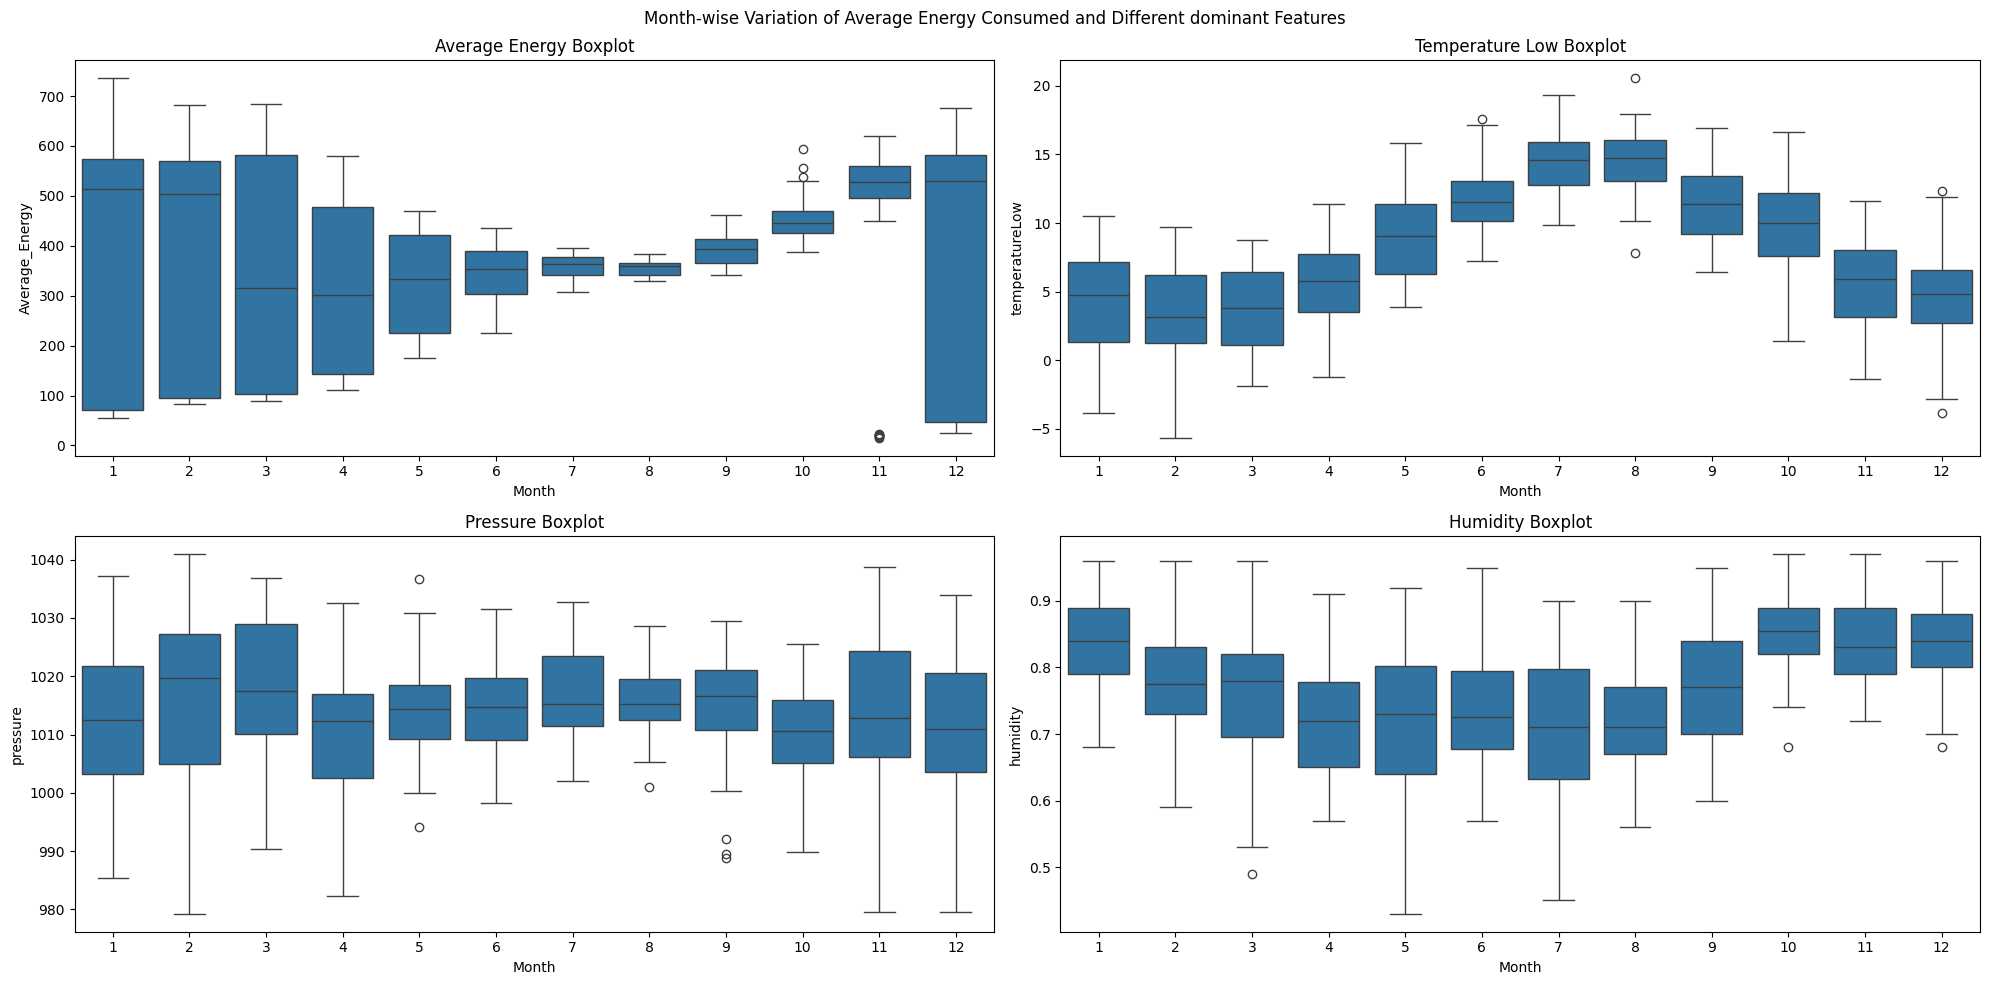

In [32]:
# Creating subplots
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

# Boxplot for 'Average_Energy' in the first subplot
plt1 = sns.boxplot(data=data, y='Average_Energy', x=data.index.month, ax=ax[0, 0])
plt1.set_title('Average Energy Boxplot')
plt1.set(xlabel = 'Month')

# Boxplot for 'temperatureLow' in the second subplot
plt2 = sns.boxplot(data=data, y='temperatureLow', x=data.index.month, ax=ax[0, 1])
plt2.set_title('Temperature Low Boxplot')
plt2.set(xlabel = 'Month')

# Boxplot for 'pressure' in the second subplot
plt3 = sns.boxplot(data=data, y='pressure', x=data.index.month, ax=ax[1, 0])
plt3.set_title('Pressure Boxplot')
plt3.set(xlabel = 'Month')

# Boxplot for 'humidity' in the second subplot
plt4 = sns.boxplot(data=data, y='humidity', x=data.index.month, ax=ax[1, 1])
plt4.set_title('Humidity Boxplot')
plt4.set(xlabel = 'Month')



plt.suptitle("Month-wise Variation of Average Energy Consumed and Different dominant Features")
plt.tight_layout()
plt.show()


It shows the average energy consumption increases during the winters from Dec-Feb months, due to low temperatures and subsequently the energy consumption keeps on decreasing from  March-April till till August due to increased low temperatures.   

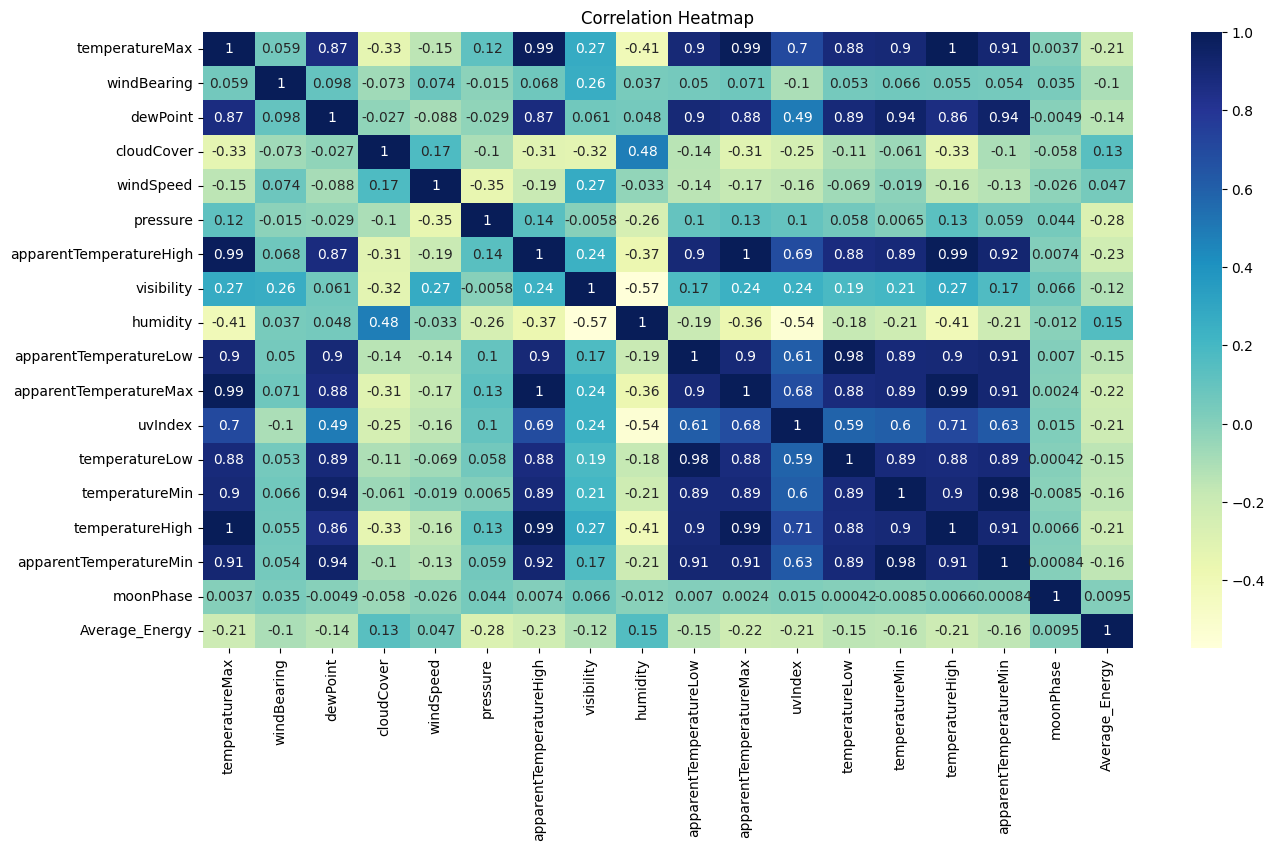

In [33]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

# **Task-2 : Prediction for January Month Data**

In [34]:
# Extracting data for January Month

data_jan = data[data.index.month == 1]
data_jan.head()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Average_Energy
Date,,,,,,,,,,,,,,,,,,
2012-01-01,12.59,227.0,9.45,0.58,4.92,1004.82,12.56,12.33,0.90,1.65,12.59,1.0,5.18,7.71,12.56,4.86,0.26,56.30
2012-01-02,7.57,237.0,2.80,0.21,4.81,1008.49,4.04,13.23,0.81,1.27,4.80,1.0,4.69,4.69,7.57,0.87,0.29,57.33
2012-01-03,12.41,234.0,5.73,0.48,8.47,1003.23,12.41,10.80,0.82,0.79,12.41,1.0,5.27,5.96,12.41,1.73,0.32,56.06
2012-01-04,9.33,253.0,3.38,0.49,7.98,1014.07,4.36,12.62,0.78,3.84,4.77,1.0,8.16,5.27,8.21,0.79,0.35,58.54
2012-01-05,11.46,283.0,4.28,0.47,9.49,1004.74,11.04,12.92,0.70,1.64,11.46,1.0,4.40,7.34,11.04,3.67,0.38,58.82


In [35]:
data_jan.describe()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Average_Energy
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,8.287097,201.548387,3.478925,0.531613,3.989785,1012.192473,6.423656,10.620753,0.837957,1.536559,6.938172,1.000000,4.264624,3.818065,7.963871,1.046344,0.484409,400.131828
std,3.421272,77.467597,3.216213,0.178047,1.971164,12.690626,4.375148,2.378021,0.058450,3.689941,4.221921,0.147442,3.554422,3.386013,3.432670,3.290615,0.284782,243.823309
min,-0.060000,18.000000,-2.880000,0.140000,0.200000,985.330000,-6.090000,4.120000,0.680000,-7.280000,-2.560000,0.000000,-3.860000,-3.860000,-0.810000,-7.800000,0.010000,56.040000
25%,6.270000,171.000000,1.440000,0.400000,2.500000,1003.230000,4.040000,9.640000,0.790000,-1.290000,4.340000,1.000000,1.370000,1.300000,6.010000,-1.160000,0.260000,71.230000
50%,9.180000,218.000000,3.880000,0.530000,3.980000,1012.500000,6.260000,11.410000,0.840000,1.430000,6.660000,1.000000,4.760000,3.350000,8.680000,1.020000,0.470000,513.610000
75%,10.820000,253.000000,5.810000,0.670000,4.810000,1021.720000,10.270000,12.440000,0.890000,4.620000,10.820000,1.000000,7.160000,6.910000,10.270000,3.290000,0.720000,574.800000
max,13.090000,359.000000,9.990000,0.930000,9.490000,1037.150000,13.090000,13.450000,0.960000,10.480000,13.090000,2.000000,10.480000,9.760000,13.090000,7.250000,0.990000,735.520000


In [36]:
from sklearn.model_selection import train_test_split

data_train_jan, data_test_jan = train_test_split(data_jan, train_size=0.7, random_state=42)

# Extracting X_train X_test y_train y_test for January Month

y_train_jan = data_train_jan.pop('Average_Energy')
X_train_jan = data_train_jan

y_test_jan = data_test_jan.pop('Average_Energy')
X_test_jan = data_test_jan

X_test_jan.shape, X_train_jan.shape

((28, 17), (65, 17))

In [37]:
# Defining the best estimator model found after HPT on whole data for making DT on Jan Data 
DT2_jan = grid_search.best_estimator_
DT2_jan

DecisionTreeRegressor(max_depth=5, min_samples_leaf=60, random_state=42)

In [38]:
DT2_jan.fit(X_train_jan, y_train_jan)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=60, random_state=42)

In [39]:
from sklearn.metrics import mean_squared_error

y_train_pred_jan = DT2_jan.predict(X_train_jan)
y_test_pred_jan = DT2_jan.predict(X_test_jan)

# Compute Mean Squared Error (MSE) for January training data
mse_train_jan = mean_squared_error(y_train_jan, y_train_pred_jan)
print(f'Mean Squared Error (MSE) on Training Data (after HPT) : {mse_train_jan:.2f}')

# Compute Mean Squared Error (MSE) for January test data
mse_test_jan = mean_squared_error(y_test_jan, y_test_pred_jan)
print(f'Mean Squared Error (MSE) on Test Data (after HPT) : {mse_test_jan:.2f}')

Mean Squared Error (MSE) on Training Data (after HPT) : 57297.60
Mean Squared Error (MSE) on Test Data (after HPT) : 63034.66


### Using Hyperparameter Tuning for making the DT model for January Data

In [40]:
params_jan = {
    'max_depth' : range(2,30),
    'min_samples_leaf' : range(5,100,5)
}

dt = DecisionTreeRegressor(random_state=42)

grid_search_jan = GridSearchCV(estimator=dt, param_grid=params_jan, n_jobs=-1, cv=6, verbose=1, scoring="neg_mean_squared_error" )

In [41]:
%%time

grid_search_jan.fit(X_train_jan, y_train_jan)


Fitting 6 folds for each of 532 candidates, totalling 3192 fits
CPU times: user 1.05 s, sys: 37.7 ms, total: 1.09 s
Wall time: 9.49 s


GridSearchCV(cv=6, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 30),
                         'min_samples_leaf': range(5, 100, 5)},
             scoring='neg_mean_squared_error', verbose=1)

In [42]:
DT_jan_hpt = grid_search_jan.best_estimator_
DT_jan_hpt

DecisionTreeRegressor(max_depth=2, min_samples_leaf=15, random_state=42)

[Text(0.6, 0.8333333333333334, 'pressure <= 1019.035\nsquared_error = 57297.6\nsamples = 65\nvalue = 414.772'),
 Text(0.4, 0.5, 'apparentTemperatureMin <= -0.455\nsquared_error = 36324.924\nsamples = 47\nvalue = 494.271'),
 Text(0.2, 0.16666666666666666, 'squared_error = 2919.914\nsamples = 18\nvalue = 627.786'),
 Text(0.6, 0.16666666666666666, 'squared_error = 39126.932\nsamples = 29\nvalue = 411.4'),
 Text(0.8, 0.5, 'squared_error = 52466.175\nsamples = 18\nvalue = 207.189')]

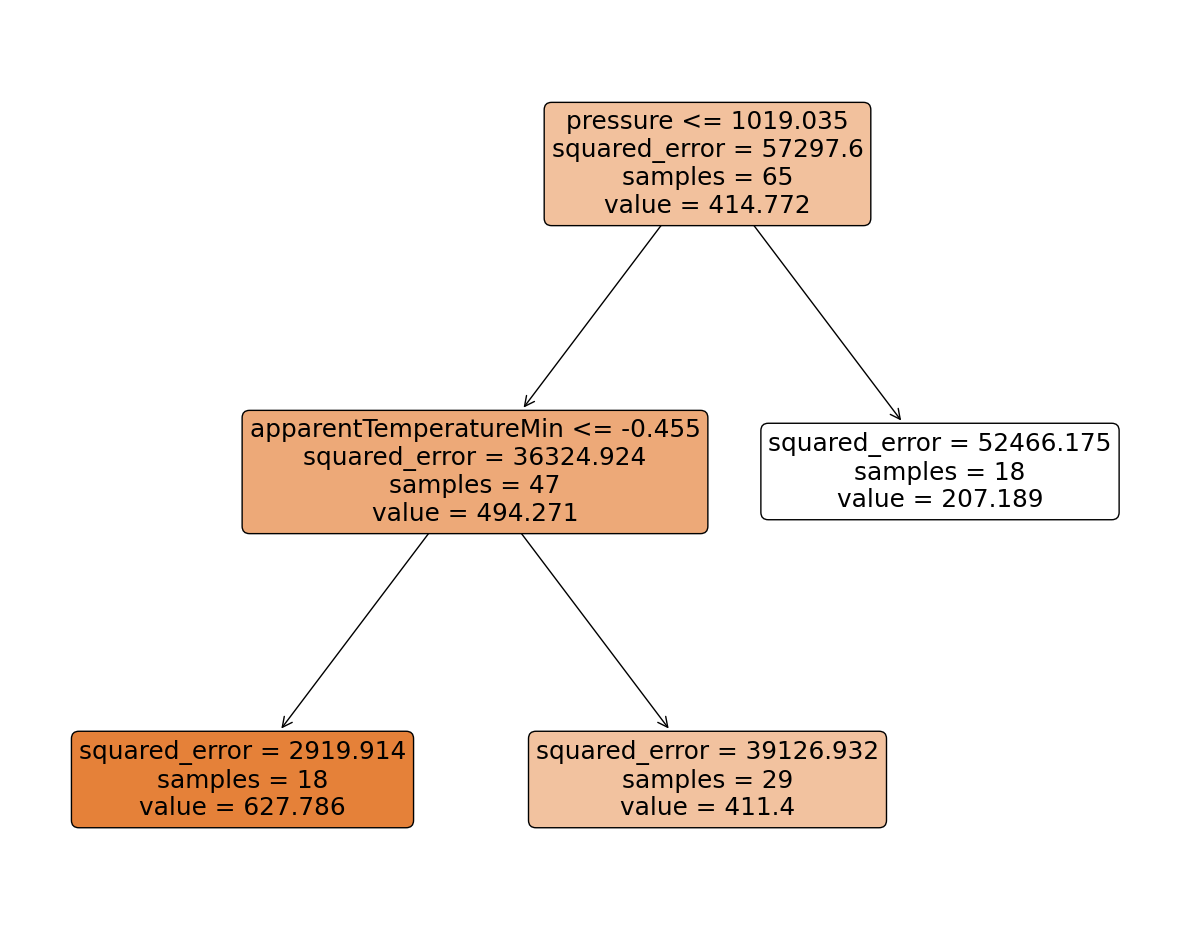

In [43]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 12))
plot_tree(DT_jan_hpt, feature_names=X_train.columns, rounded=True, filled= True)

In [44]:
from sklearn.metrics import mean_squared_error

y_train_pred_hpt_jan = DT_jan_hpt.predict(X_train_jan)
y_test_pred_hpt_jan = DT_jan_hpt.predict(X_test_jan)

# Compute Mean Squared Error (MSE) for January training data
mse_train_hpt_jan = mean_squared_error(y_train_jan, y_train_pred_hpt_jan)
print(f'Mean Squared Error (MSE) on Training Data (after HPT) : {mse_train_hpt_jan:.2f}')

# Compute Mean Squared Error (MSE) for January test data
mse_test_hpt_jan = mean_squared_error(y_test_jan, y_test_pred_hpt_jan)
print(f'Mean Squared Error (MSE) on Test Data (after HPT) : {mse_test_hpt_jan:.2f}')

Mean Squared Error (MSE) on Training Data (after HPT) : 32794.32
Mean Squared Error (MSE) on Test Data (after HPT) : 40177.68


Errors have been reduced using specific HPT for January Data

In [45]:
# Importance of features

importance_df_DT_jan_hpt = pd.DataFrame({
    "Feature" : X_train_jan.columns,
    "Imp %" : (DT_jan_hpt.feature_importances_*100).round(2)})

importance_df_DT_jan_hpt.sort_values(by='Imp %', ascending=False)

,Feature,Imp %
5,pressure,67.35
15,apparentTemperatureMin,32.65
0,temperatureMax,0.00
9,apparentTemperatureLow,0.00
14,temperatureHigh,0.00
13,temperatureMin,0.00
12,temperatureLow,0.00
11,uvIndex,0.00
10,apparentTemperatureMax,0.00
8,humidity,0.00


It seems the most dominant features for January Month are pressure and Apparent Min Temperature only. Similarly if we make different models for monthly data, the dominant features may change and provides the DT_regressor with better predictions for monthly data.

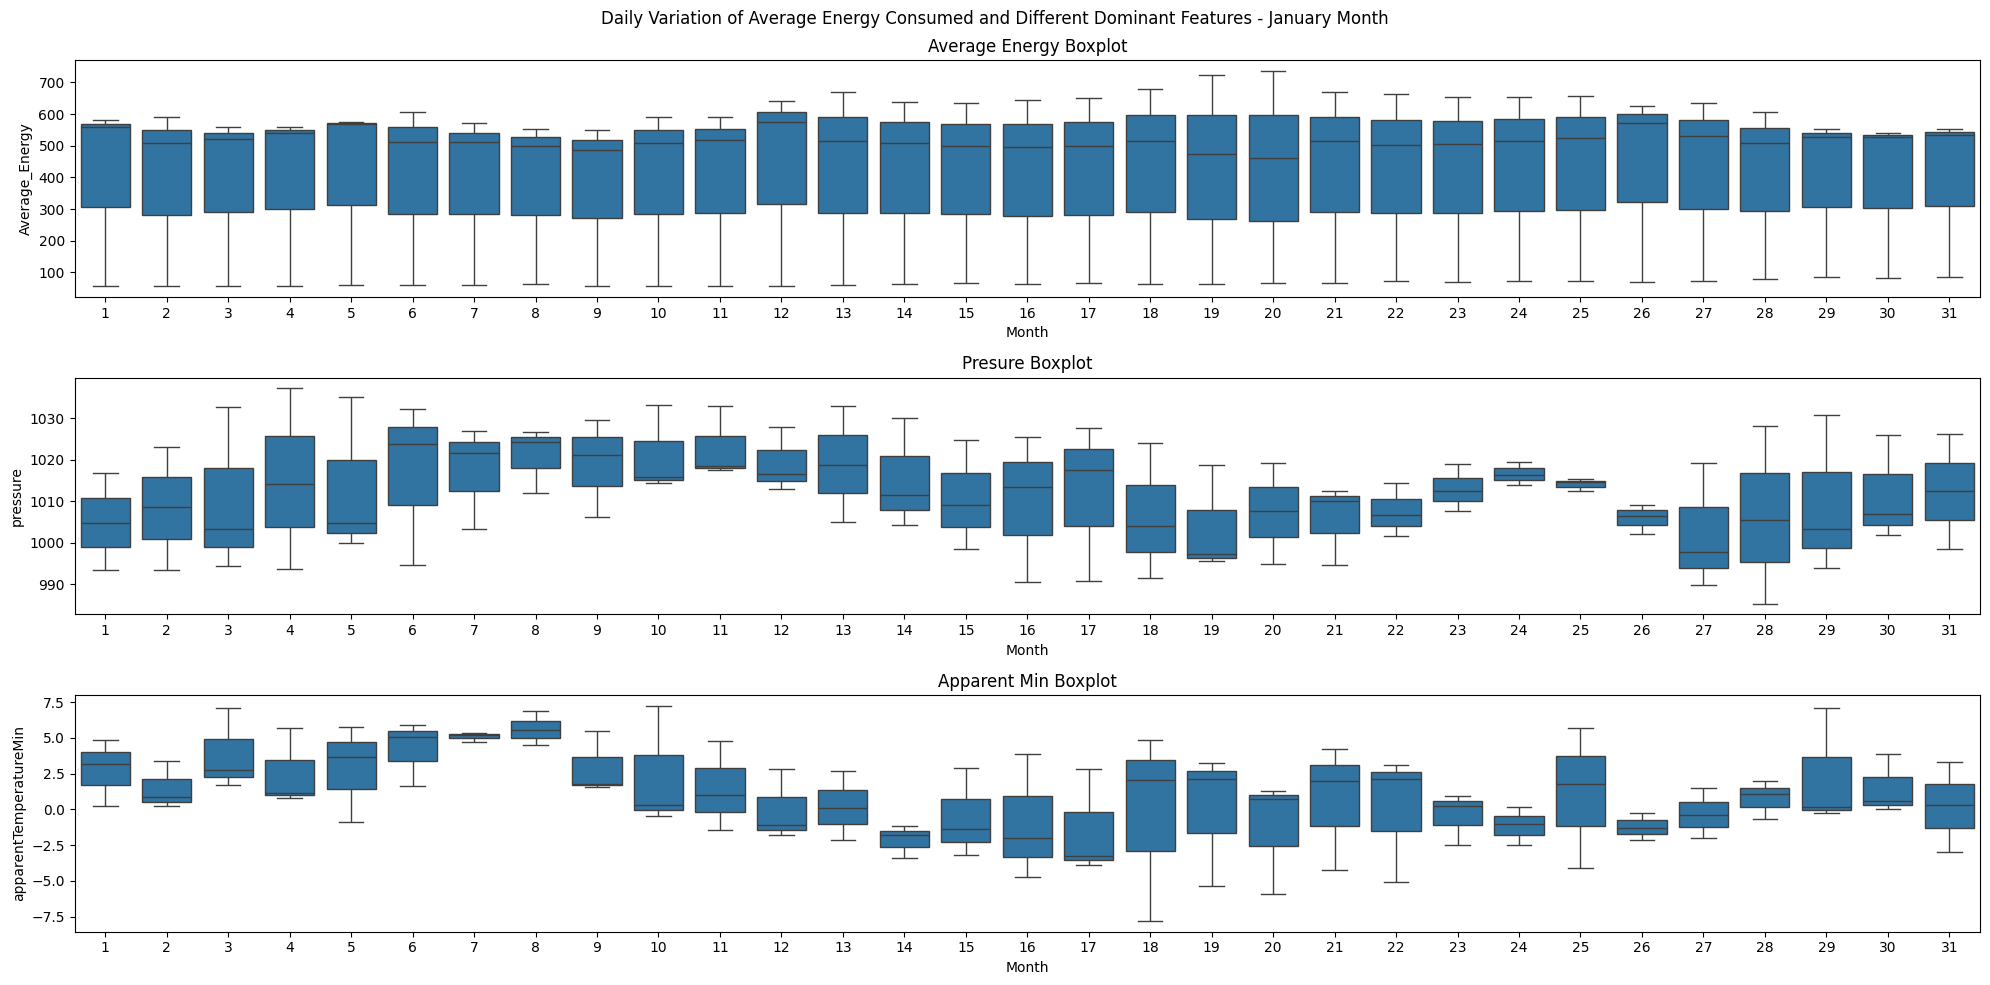

In [46]:
# Creating subplots
fig, ax = plt.subplots(3, figsize=(20, 10))

# Boxplot for 'Average_Energy' in the first subplot
plt1 = sns.boxplot(data=data_jan, y='Average_Energy', x=data_jan.index.day, ax=ax[0])
plt1.set_title('Average Energy Boxplot')
plt1.set(xlabel = 'Month')


# Boxplot for 'pressure' in the second subplot
plt2 = sns.boxplot(data=data_jan, y='pressure', x=data_jan.index.day, ax=ax[1])
plt2.set_title('Presure Boxplot')
plt2.set(xlabel = 'Month')

# Boxplot for 'apparentTemperatureMin' in the second subplot
plt2 = sns.boxplot(data=data_jan, y='apparentTemperatureMin', x=data_jan.index.day, ax=ax[2])
plt2.set_title('Apparent Min Boxplot')
plt2.set(xlabel = 'Month')

plt.suptitle("Daily Variation of Average Energy Consumed and Different Dominant Features - January Month")
plt.tight_layout()
plt.show()